In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import house_sales_data as hsd
from sklearn.model_selection import train_test_split

In [176]:
## Sacramento house price data; load
data = hsd.house_sales_data() 
print(data.keys())

## Get the target (i.e., price) and two features
price = data["price"]
area = data["area"]
beds = data["beds"]

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [177]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []

    for itr in range(max_iteration):
        costs.append(sum((np.inner(X, theta) - y)**2)/m)
        for i in range(X.shape[1]):
            theta[i] = theta[i] - learning_rate*2*sum((np.inner(X, theta) - y)*X[:,i])/m
    return theta, costs

In [178]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    
    X[:,normalize_cols] = (X[:,normalize_cols]-min_X)/(max_X-min_X)
    y = (y-min_y)/(max_y-min_y)
    
    return X, y, min_X, max_X, min_y, max_y

In [179]:
# unnormalize theta
def denormalize_theta(X, y, theta):
    X, y, min_X, max_X, min_y, max_y = normalize_data(X, y, [True, True, False])
    range_y = max_y-min_y
    range_X = max_X-min_X

    theta_hat = np.zeros(len(theta))
    add = 0

    for i in range(len(theta)-1):
        theta_hat[i] = range_y/range_X[i]*theta[i]
        add = add + theta_hat[i]*min_X[i]
    theta_hat[-1] = theta[-1]*range_y+min_y-add
    
    return theta_hat

In [180]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    #return np.mean(sum((y - y_hat)**2))
    return np.linalg.norm((y - y_hat)/len(y)**0.5)

In [181]:
# Prepare data this way
X = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y = price

X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=42)
X_norm, y_norm, min_X, max_X, min_y, max_y = normalize_data(X_train.copy(), y_train.copy(), [True, True, False])


In [182]:
theta, costs = gradient_descent(X_norm.copy(), y_norm.copy(), 100, 1.0)
#print(theta)

Text(0, 0.5, 'cost')

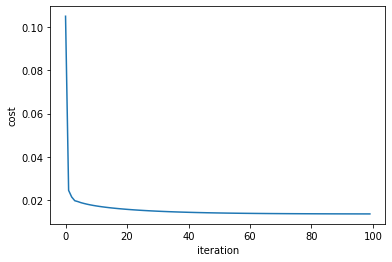

In [183]:
# plot cost vs iterations 
plt.plot(np.arange(0,100), costs)
plt.xlabel("iteration")
plt.ylabel("cost")
# note gradient descent return costs for all iterations

In [184]:
# print evaluation metric for test set while 
theta_hat1 = denormalize_theta(X_train.copy(), y_train.copy(), gradient_descent(X_norm.copy(), y_norm.copy(), 500, 0.5)[0])
y_predict1 = X_test @ theta_hat1
print(evaluation_metric(y_test, y_predict1))

theta_hat2 = denormalize_theta(X_train.copy(), y_train.copy(), gradient_descent(X_norm.copy(), y_norm.copy(), 2000, 0.5)[0])
y_predict2 = X_test @ theta_hat2
print(evaluation_metric(y_test, y_predict2))
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get

72.26490129664789
72.24862726027973


In [185]:
# compare your solution with scikit-learn library
from sklearn import linear_model

X0_train, X0_test, y0_train, y0_test = train_test_split(np.array([area,beds]).T, price, test_size=0.2, random_state=42)

In [186]:
# Create linear regression object
from sklearn import linear_model

In [187]:
# Train the model using the training sets
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X0_train, y0_train)
print('slope :',lin_reg.coef_,', intercept: ',lin_reg.intercept_)

slope : [146.78409491 -16.30314601] , intercept:  50.054871861560656


In [188]:
# Predict on test set and print evaluation metric
y0_predict = lin_reg.predict(X0_test)
print(evaluation_metric(y0_test, y0_predict))

72.24862725906654
